In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import glob
import numpy as np
import cv2

In [15]:
position_df = pd.read_csv('position.csv', sep=';', names=['datetime', 'x', 'y', 'z'])
position_df['datetime'] = pd.to_datetime(position_df['datetime'])
position_df[0:6]

,datetime,x,y,z
0,2021-10-26 17:14:46.296338,0.00000,0.00000,0.0
1,2021-10-26 17:14:46.299381,-1.93832,-6.38489,0.0
2,2021-10-26 17:14:46.356930,0.00004,-0.00003,0.0
3,2021-10-26 17:14:46.418864,0.00003,-0.00007,0.0
4,2021-10-26 17:14:46.458030,0.00005,-0.00007,0.0
5,2021-10-26 17:14:46.516357,0.00004,-0.00005,0.0


In [16]:
position_df['t_diff_from_last'] = [0] + [(position_df['datetime'][i] - position_df['datetime'][i-1]).microseconds for i in range(1, len(position_df))]
position_df['distance_from_last'] = [0] + [
    ((position_df['x'][i] - position_df['x'][i-1])**2 + (position_df['y'][i] - position_df['y'][i-1])**2)**.5
    for i in range(1, len(position_df))
]
def weird_division(n, d):
    return n / d if d else 0
position_df['velocity'] = [weird_division(distance, time_step) for distance, time_step in zip(position_df['distance_from_last'], position_df['t_diff_from_last'])]
position_df = position_df.drop(0).drop(1)

In [17]:
position_df.describe()

,x,y,z,t_diff_from_last,distance_from_last,velocity
count,603.000000,603.000000,603.0,603.000000,603.000000,6.030000e+02
mean,-0.132506,0.339310,0.0,51912.354892,0.021086,4.044340e-07
std,0.436950,0.298100,0.0,14169.989711,0.272021,4.733644e-06
min,-1.076510,-0.000070,0.0,1204.000000,0.000000,0.000000e+00
25%,-0.272225,0.123265,0.0,40859.000000,0.000194,3.752167e-09
50%,-0.269380,0.138700,0.0,54893.000000,0.000631,1.325340e-08
75%,0.415835,0.631730,0.0,60993.500000,0.007495,1.451089e-07
max,0.712570,0.845460,0.0,111749.000000,6.672606,1.159465e-04


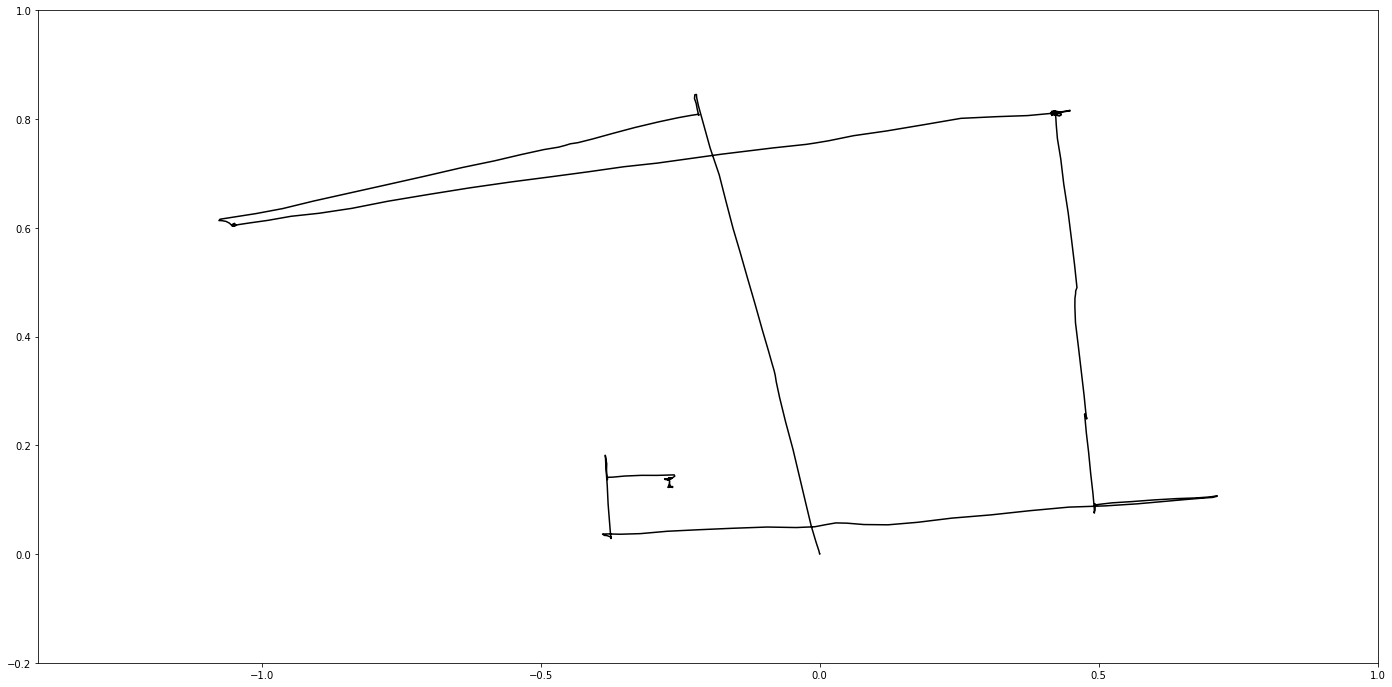

In [22]:
x, y = position_df['x'], position_df['y']

fig, ax = plt.subplots(figsize=(24, 12))
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([-1.4, 1, -0.2, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True)
ani.save('test.gif')
plt.show()

In [6]:
filepaths = glob.glob('video_frames/*.png')
filepaths[1]

'video_frames/2021-10-26 17:15:10.205401.png'

In [7]:
img1 = cv2.imread(filepaths[1], 0)          # queryImage
img2 = cv2.imread(filepaths[2], 0) # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches, flags=2, outImg=None)

cv2.imshow('image',img3)
cv2.waitKey(0)